In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.5 MB/s eta 0:00:00


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator
from pmdarima import auto_arima

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


***Du doan cho bo tinh Da Nang***

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Dataset_PTDLKD/AQI_DaNang_Done.csv')
# df = df.dropna()
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date')
df = df.reset_index()
df = df.reset_index()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1887 entries, 0 to 1886
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   level_0   1887 non-null   int64         
 1   index     1887 non-null   int64         
 2   date      1887 non-null   datetime64[ns]
 3   pm25      1887 non-null   float64       
 4   pm10      1887 non-null   float64       
 5   o3        1887 non-null   float64       
 6   no2       1887 non-null   float64       
 7   so2       1887 non-null   float64       
 8   co        1887 non-null   float64       
 9   year      1697 non-null   float64       
 10  AQI_pm25  1887 non-null   float64       
 11  AQI_pm10  1887 non-null   float64       
 12  AQI_o3    1887 non-null   float64       
 13  AQI_no2   1887 non-null   float64       
 14  AQI_so2   1887 non-null   float64       
 15  AQI_co    1887 non-null   float64       
 16  AQI       1887 non-null   float64       
dtypes: datetime64[

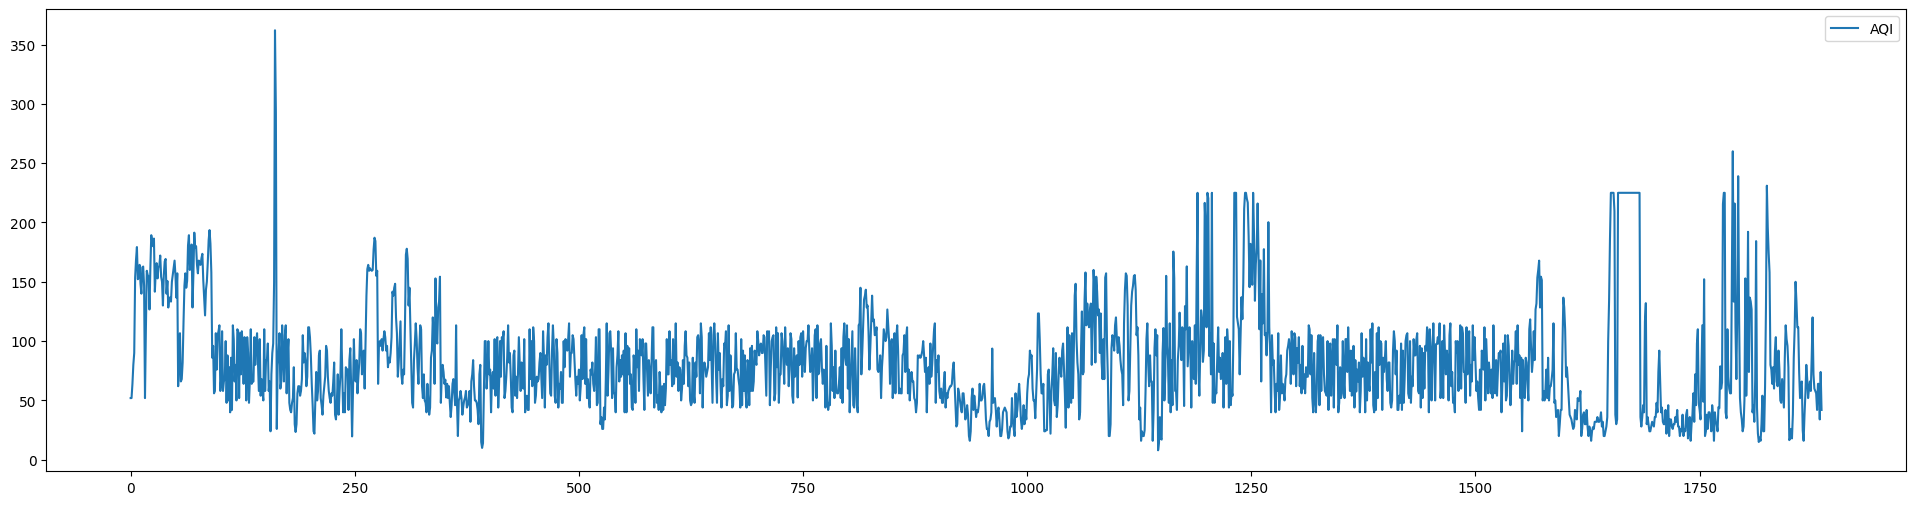

In [ ]:
plt.figure(figsize=(24, 6))
plt.plot(df.index, df['AQI'])
plt.legend(['AQI'])
plt.show()

**Chia du lieu thanh 7:2:1**

In [ ]:
# Chia dữ liệu thành tập train, tập test, tập validate theo tỉ lệ 7:2:1
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]


In [ ]:
model = auto_arima(train_data['AQI'],
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)
model.fit(train_data['AQI'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=12652.093, Time=1.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12976.864, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12855.668, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12743.749, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12974.864, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=12649.675, Time=1.93 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=12665.510, Time=1.17 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12648.112, Time=1.34 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=12649.772, Time=1.93 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=12782.169, Time=0.22 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=12646.160, Time=0.31 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=12741.749, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=12853.668, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=12647.827, Time=0.47 sec
 ARIMA(1,1,2)(0,0,0

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
# Test
test_pred = model.predict(n_periods=len(test_data.index))
# Validate
val_pred = model.predict(n_periods=len(val_data.index))
# Dự đoán 10 tháng tiếp theo
next_30days_pred = model.predict( n_periods=30)

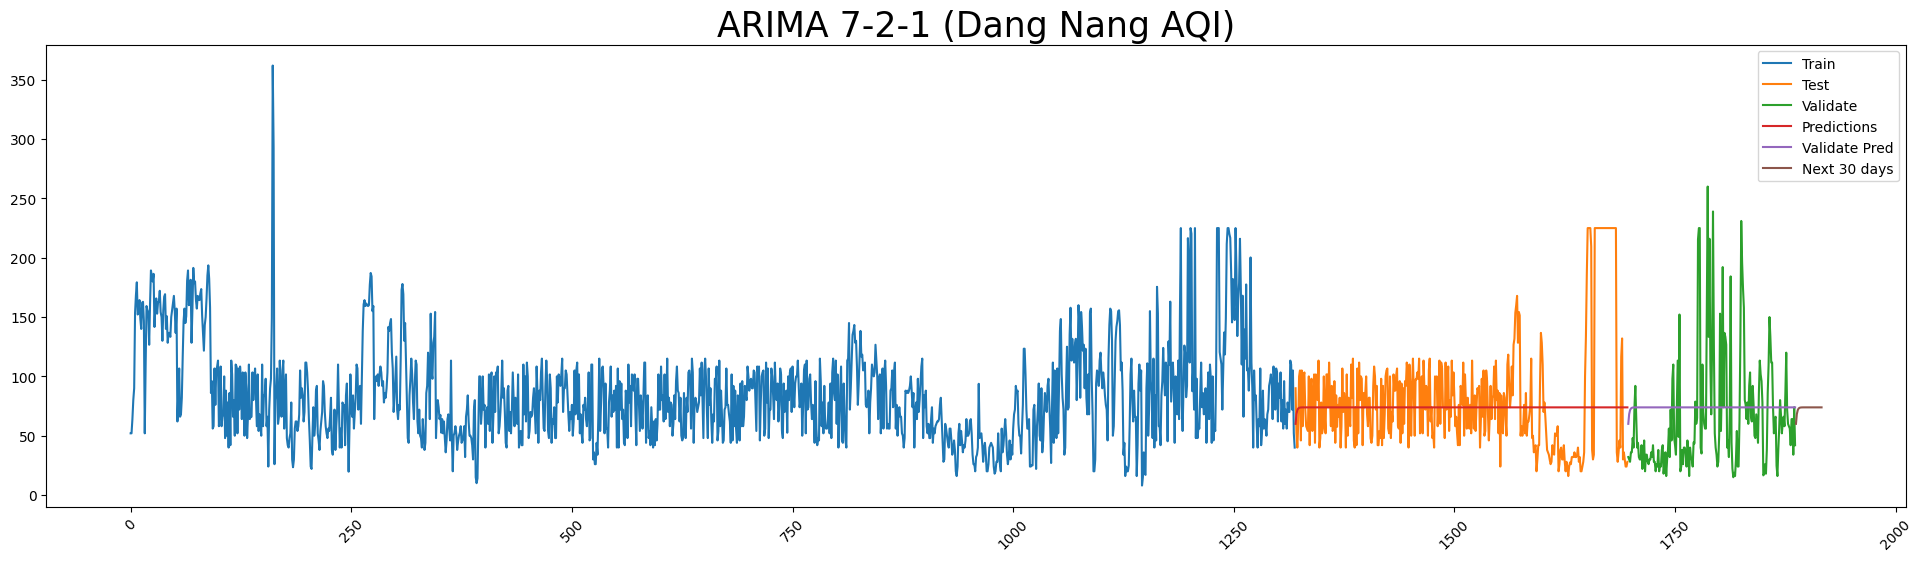

In [ ]:
# Lấy giá trị của cột number_days ở dòng cuối cùng
last_number_days = df.index[-1]

# Tạo một Series mới với 30 ngày tiếp theo dựa vào giá trị cuối cùng của cột number_days
next_30_days_data = pd.Series(range(last_number_days + 1, last_number_days + 31))


plt.figure(figsize=(24, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])
plt.plot(val_data.index, val_data['AQI'])

plt.plot(test_data.index, test_pred)
plt.plot(val_data.index, val_pred)
plt.plot(next_30_days_data , next_30days_pred)
plt.legend(['Train', 'Test', 'Validate', 'Predictions', 'Validate Pred', 'Next 30 days'])
plt.xticks(rotation=45)
plt.title('ARIMA 7-2-1 (Dang Nang AQI)', fontsize=25)
plt.show()

****Chia lai data thanh 8:1:1****

In [ ]:
# Chia dữ liệu thành tập train, tập test, tập validate theo tỉ lệ 8:1:1
train_size = int(0.8 * len(df))
test_size = int(0.1 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [ ]:
model = auto_arima(train_data['AQI'],
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)
model.fit(train_data['AQI'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=14430.804, Time=5.39 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14853.957, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14676.829, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14523.209, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14851.957, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=14431.637, Time=1.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=14432.319, Time=1.21 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=14434.304, Time=2.93 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=14433.681, Time=2.51 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=14432.446, Time=0.86 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=14432.216, Time=3.98 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=14431.877, Time=2.55 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=14436.298, Time=4.34 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=14424.014, Time=1.67 sec
 ARIMA(1,1,2)(0,0,0

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
# Test
test_pred = model.predict(n_periods=len(test_data.index))
# Validate
val_pred = model.predict(n_periods=len(val_data.index))
# Dự đoán 10 tháng tiếp theo
next_30days_pred = model.predict( n_periods=30)

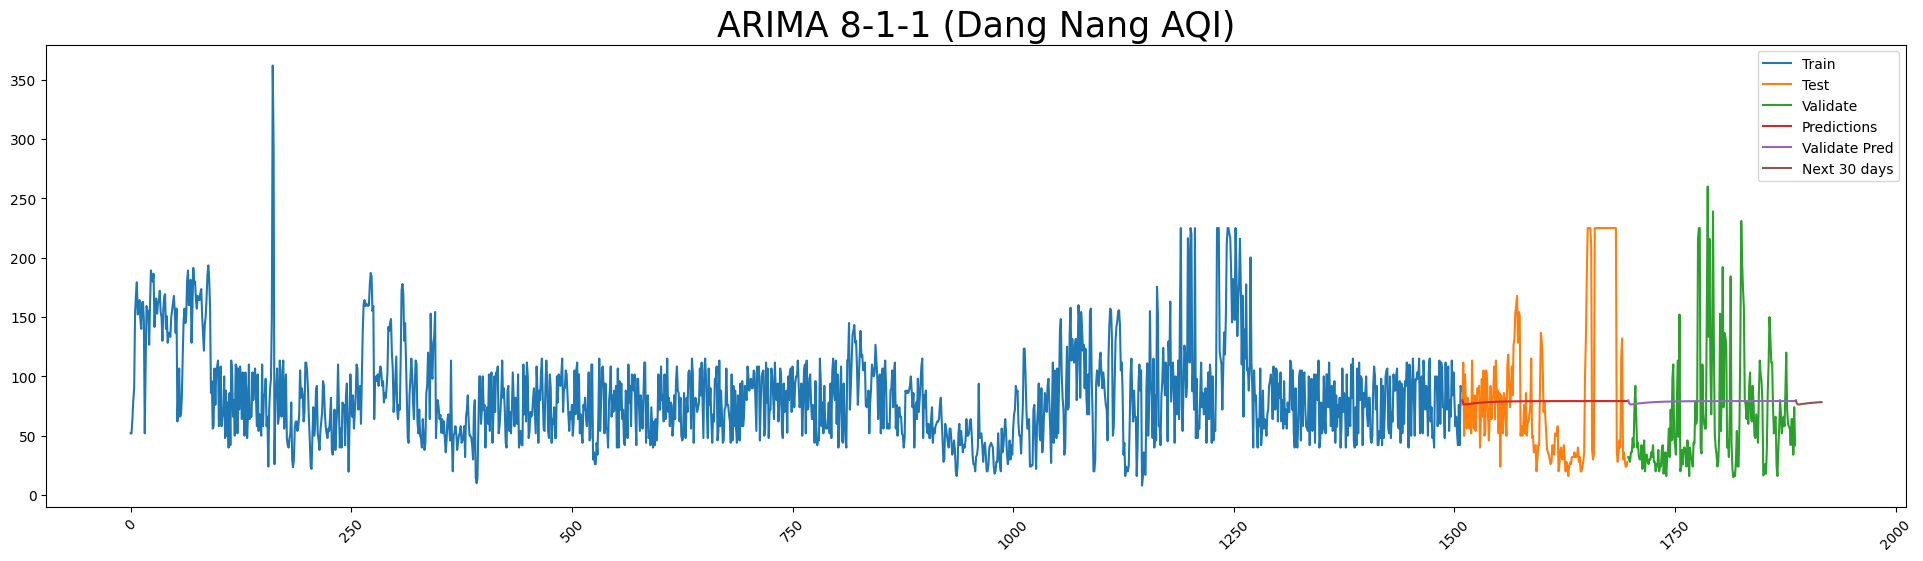

In [ ]:
# Lấy giá trị của cột number_days ở dòng cuối cùng
last_number_days = df.index[-1]

# Tạo một Series mới với 30 ngày tiếp theo dựa vào giá trị cuối cùng của cột number_days
next_30_days_data = pd.Series(range(last_number_days + 1, last_number_days + 31))


plt.figure(figsize=(24, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])
plt.plot(val_data.index, val_data['AQI'])

plt.plot(test_data.index, test_pred)
plt.plot(val_data.index, val_pred)
plt.plot(next_30_days_data , next_30days_pred)
plt.legend(['Train', 'Test', 'Validate', 'Predictions', 'Validate Pred', 'Next 30 days'])
plt.xticks(rotation=45)
plt.title('ARIMA 8-1-1 (Dang Nang AQI)', fontsize=25)

plt.show()

**Chia lai du lieu thanh 6:2:2**


In [ ]:
# Chia dữ liệu thành tập train, tập test, tập validate theo tỉ lệ 8:1:1
train_size = int(0.6 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [ ]:
model = auto_arima(train_data['AQI'],
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)
model.fit(train_data['AQI'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10626.335, Time=2.76 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10885.316, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10801.119, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10715.922, Time=1.52 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10883.317, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10624.824, Time=3.03 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=10639.833, Time=1.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10622.875, Time=0.58 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10624.840, Time=0.77 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=10729.461, Time=0.42 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=10621.008, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=10713.931, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=10799.120, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=10622.976, Time=0.31 sec
 ARIMA(1,1,2)(0,0,0

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
# Test
test_pred = model.predict(n_periods=len(test_data.index))
# Validate
val_pred = model.predict(n_periods=len(val_data.index))
# Dự đoán 10 tháng tiếp theo
next_30days_pred = model.predict( n_periods=30)

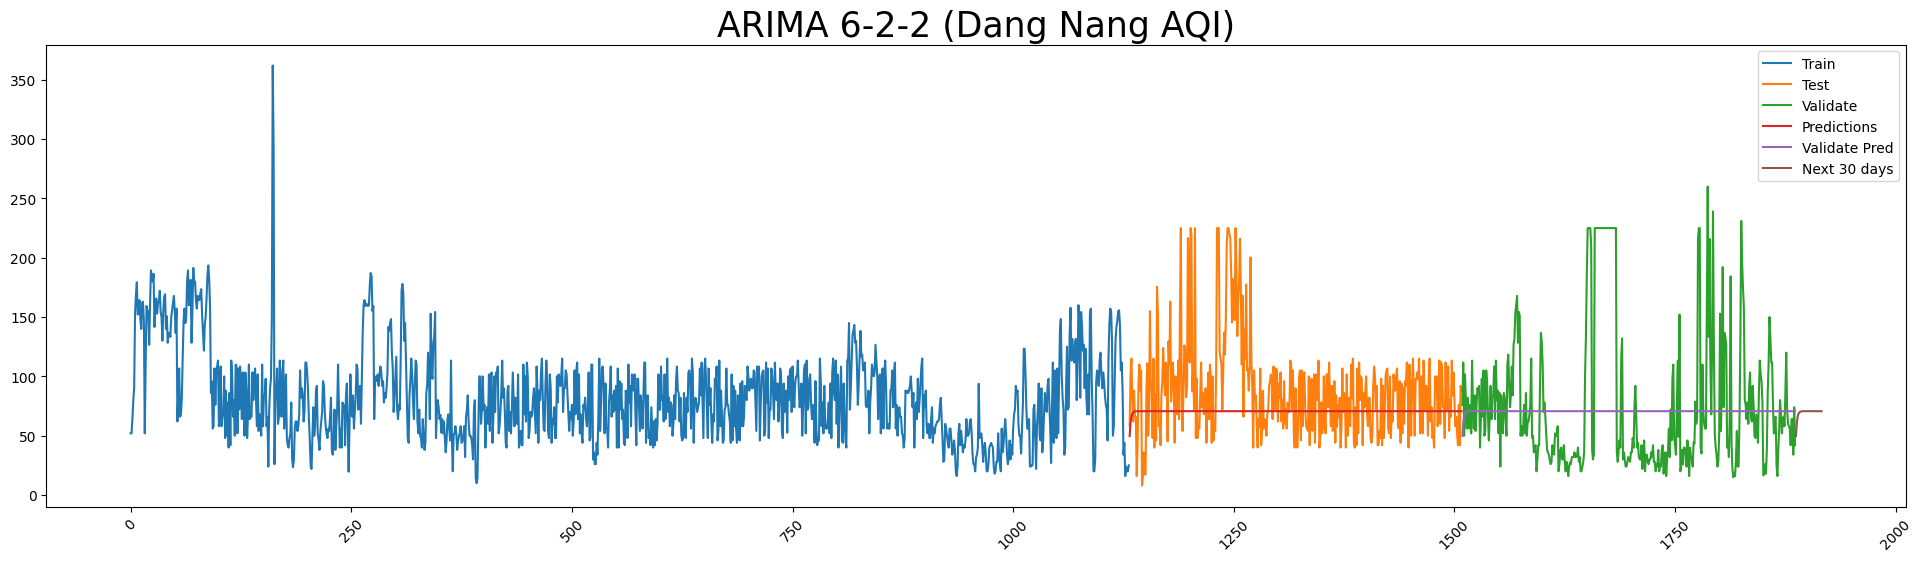

In [ ]:
# Lấy giá trị của cột number_days ở dòng cuối cùng
last_number_days = df.index[-1]

# Tạo một Series mới với 30 ngày tiếp theo dựa vào giá trị cuối cùng của cột number_days
next_30_days_data = pd.Series(range(last_number_days + 1, last_number_days + 31))


plt.figure(figsize=(24, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])
plt.plot(val_data.index, val_data['AQI'])

plt.plot(test_data.index, test_pred)
plt.plot(val_data.index, val_pred)
plt.plot(next_30_days_data , next_30days_pred)
plt.legend(['Train', 'Test', 'Validate', 'Predictions', 'Validate Pred', 'Next 30 days'])
plt.xticks(rotation=45)
plt.title('ARIMA 6-2-2 (Dang Nang AQI)', fontsize=25)

plt.show()

**Du doan cho du lieu Ha Noi**

In [ ]:
# Lay du lieu
df = pd.read_csv('/content/drive/My Drive/Dataset_PTDLKD/AQI_HaNoi_Done.csv')
df = df.dropna()
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date')
df = df.reset_index()


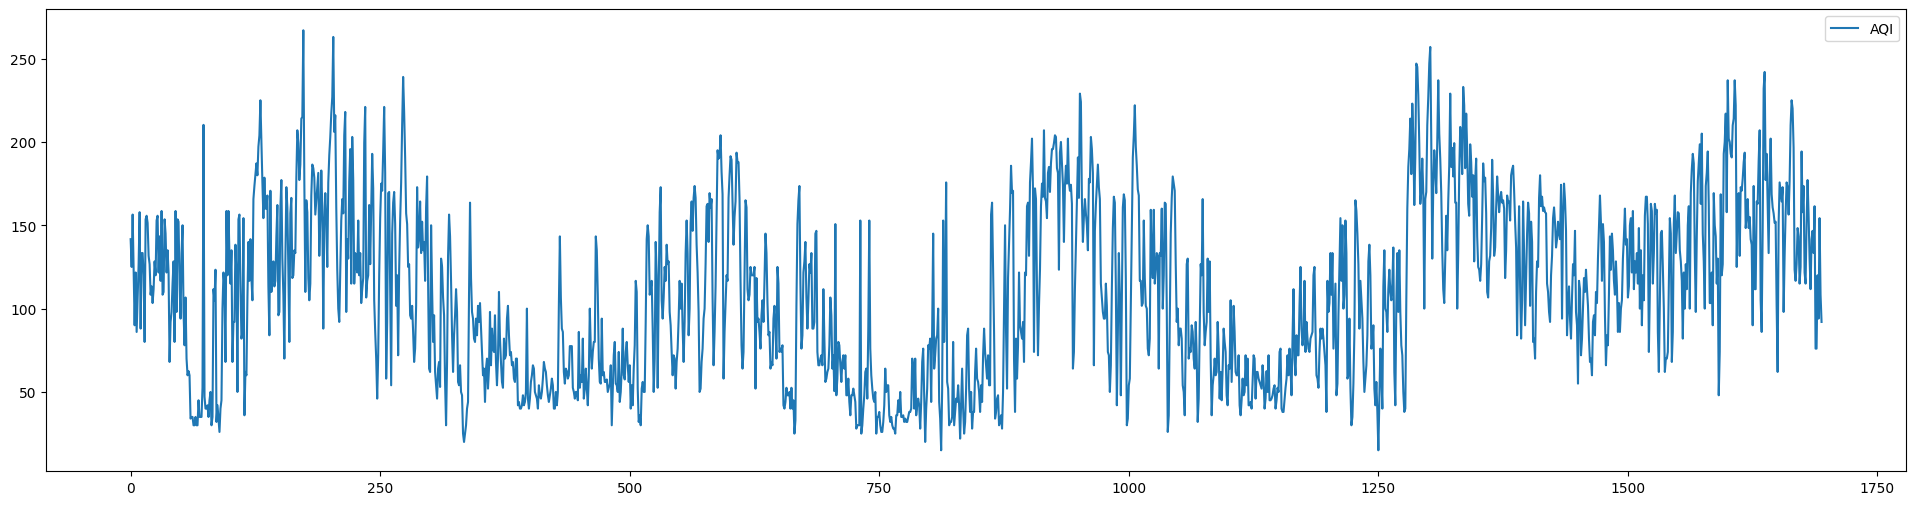

In [ ]:
plt.figure(figsize=(24, 6))
plt.plot(df.index, df['AQI'])
plt.legend(['AQI'])
plt.show()

Chia du lieu thanh 7:2:1

In [ ]:
# Chia dữ liệu thành tập train, tập test, tập validate theo tỉ lệ 7:2:1
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]


In [ ]:
model = auto_arima(train_data['AQI'],
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)
model.fit(train_data['AQI'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11352.265, Time=1.53 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11551.597, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11534.478, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11517.844, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11549.597, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=11350.273, Time=0.85 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=11398.397, Time=0.54 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11359.977, Time=0.91 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=11352.266, Time=1.40 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=11359.898, Time=0.75 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=11350.497, Time=0.93 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=11353.110, Time=2.00 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=11348.325, Time=0.82 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=11396.415, Time=0.50 sec
 ARIMA(1,1,1)(0,0,0

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
# Test
test_pred = model.predict(n_periods=len(test_data.index))
# Validate
val_pred = model.predict(n_periods=len(val_data.index))
# Dự đoán 10 tháng tiếp theo
next_30days_pred = model.predict( n_periods=30)

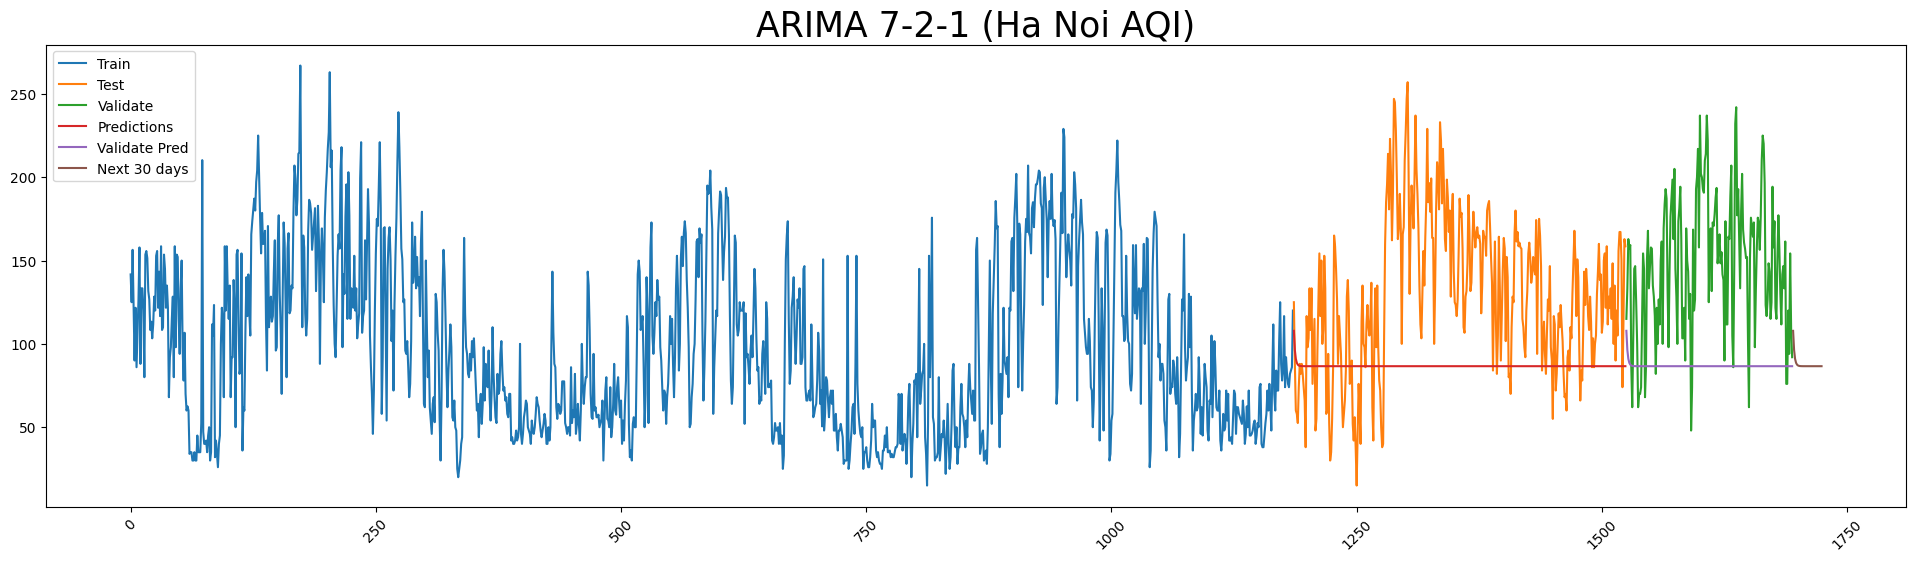

In [ ]:
# Lấy giá trị của cột number_days ở dòng cuối cùng
last_number_days = df.index[-1]

# Tạo một Series mới với 30 ngày tiếp theo dựa vào giá trị cuối cùng của cột number_days
next_30_days_data = pd.Series(range(last_number_days + 1, last_number_days + 31))


plt.figure(figsize=(24, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])
plt.plot(val_data.index, val_data['AQI'])

plt.plot(test_data.index, test_pred)
plt.plot(val_data.index, val_pred)
plt.plot(next_30_days_data , next_30days_pred)
plt.legend(['Train', 'Test', 'Validate', 'Predictions', 'Validate Pred', 'Next 30 days'])
plt.xticks(rotation=45)
plt.title('ARIMA 7-2-1 (Ha Noi AQI)', fontsize=25)

plt.show()

Chia du lieu thanh 8:1:1

In [ ]:
# Chia dữ liệu thành tập train, tập test, tập validate theo tỉ lệ 8:1:1
train_size = int(0.8 * len(df))
test_size = int(0.1 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]


In [ ]:
model = auto_arima(train_data['AQI'],
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)
model.fit(train_data['AQI'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=12993.940, Time=1.68 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13211.322, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13195.308, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13180.019, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13209.324, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=12992.033, Time=1.03 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=13051.146, Time=0.54 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13004.753, Time=0.70 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=12993.965, Time=1.56 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=13006.419, Time=0.93 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=12992.793, Time=1.38 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=12994.494, Time=4.43 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=12990.077, Time=0.89 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=13049.154, Time=0.22 sec
 ARIMA(1,1,1)(0,0,0

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
# Test
test_pred = model.predict(n_periods=len(test_data.index))
# Validate
val_pred = model.predict(n_periods=len(val_data.index))
# Dự đoán 10 tháng tiếp theo
next_30days_pred = model.predict( n_periods=30)

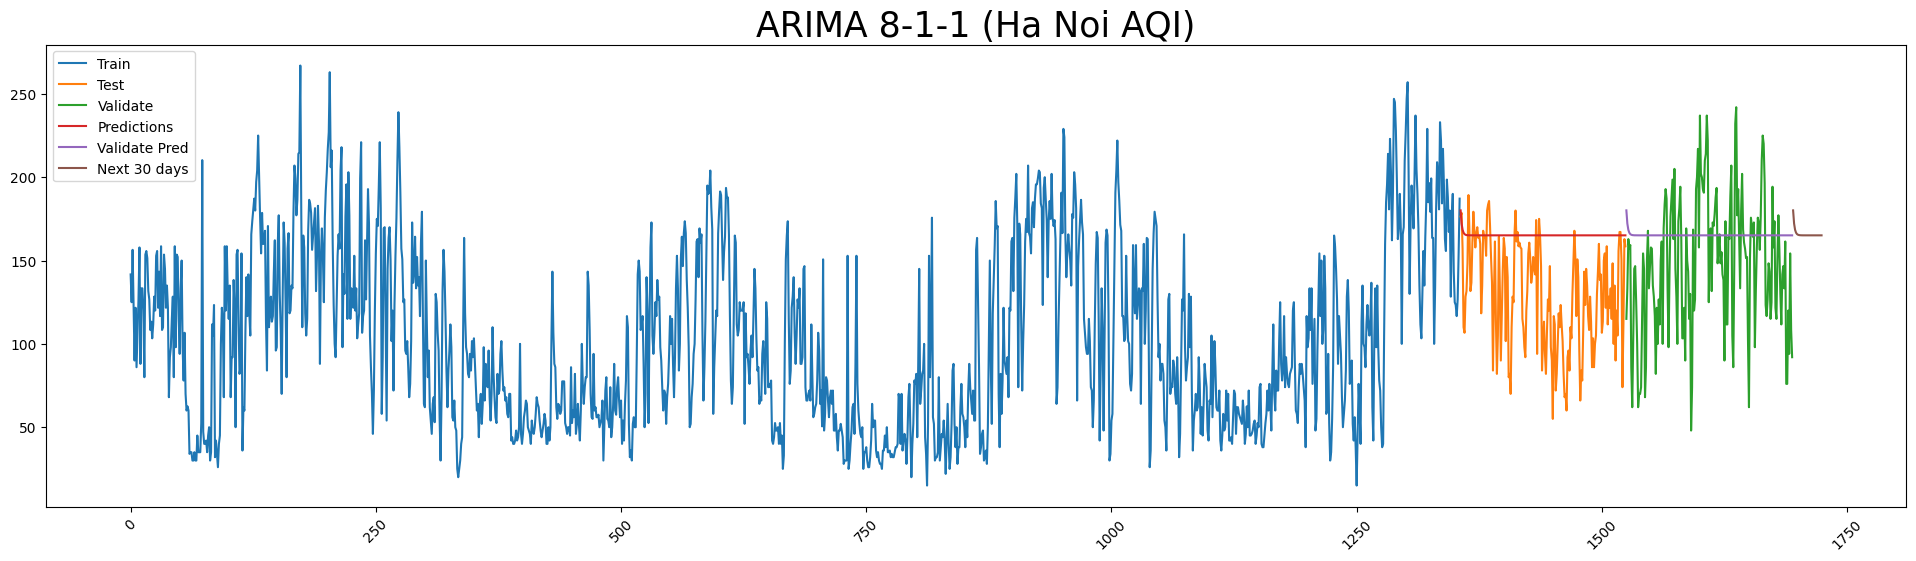

In [ ]:
# Lấy giá trị của cột number_days ở dòng cuối cùng
last_number_days = df.index[-1]

# Tạo một Series mới với 30 ngày tiếp theo dựa vào giá trị cuối cùng của cột number_days
next_30_days_data = pd.Series(range(last_number_days + 1, last_number_days + 31))


plt.figure(figsize=(24, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])
plt.plot(val_data.index, val_data['AQI'])

plt.plot(test_data.index, test_pred)
plt.plot(val_data.index, val_pred)
plt.plot(next_30_days_data , next_30days_pred)
plt.legend(['Train', 'Test', 'Validate', 'Predictions', 'Validate Pred', 'Next 30 days'])
plt.xticks(rotation=45)
plt.title('ARIMA 8-1-1 (Ha Noi AQI)', fontsize=25)

plt.show()

Chia du lieu thanh 6:2:2

In [ ]:
# Chia dữ liệu thành tập train, tập test, tập validate theo tỉ lệ 6:2:2
train_size = int(0.6 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [ ]:
model = auto_arima(train_data['AQI'],
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)
model.fit(train_data['AQI'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=9792.493, Time=1.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9959.778, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9944.406, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9929.299, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9957.778, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=9790.815, Time=0.81 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=9831.154, Time=0.46 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9797.734, Time=0.56 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=9792.727, Time=1.36 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=9801.080, Time=2.22 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=9791.307, Time=2.89 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=9793.358, Time=3.94 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=9788.816, Time=0.34 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=9829.154, Time=0.19 sec
 ARIMA(1,1,1)(0,0,0)[0]          

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
# Test
test_pred = model.predict(n_periods=len(test_data.index))
# Validate
val_pred = model.predict(n_periods=len(val_data.index))
# Dự đoán 10 tháng tiếp theo
next_30days_pred = model.predict( n_periods=30)

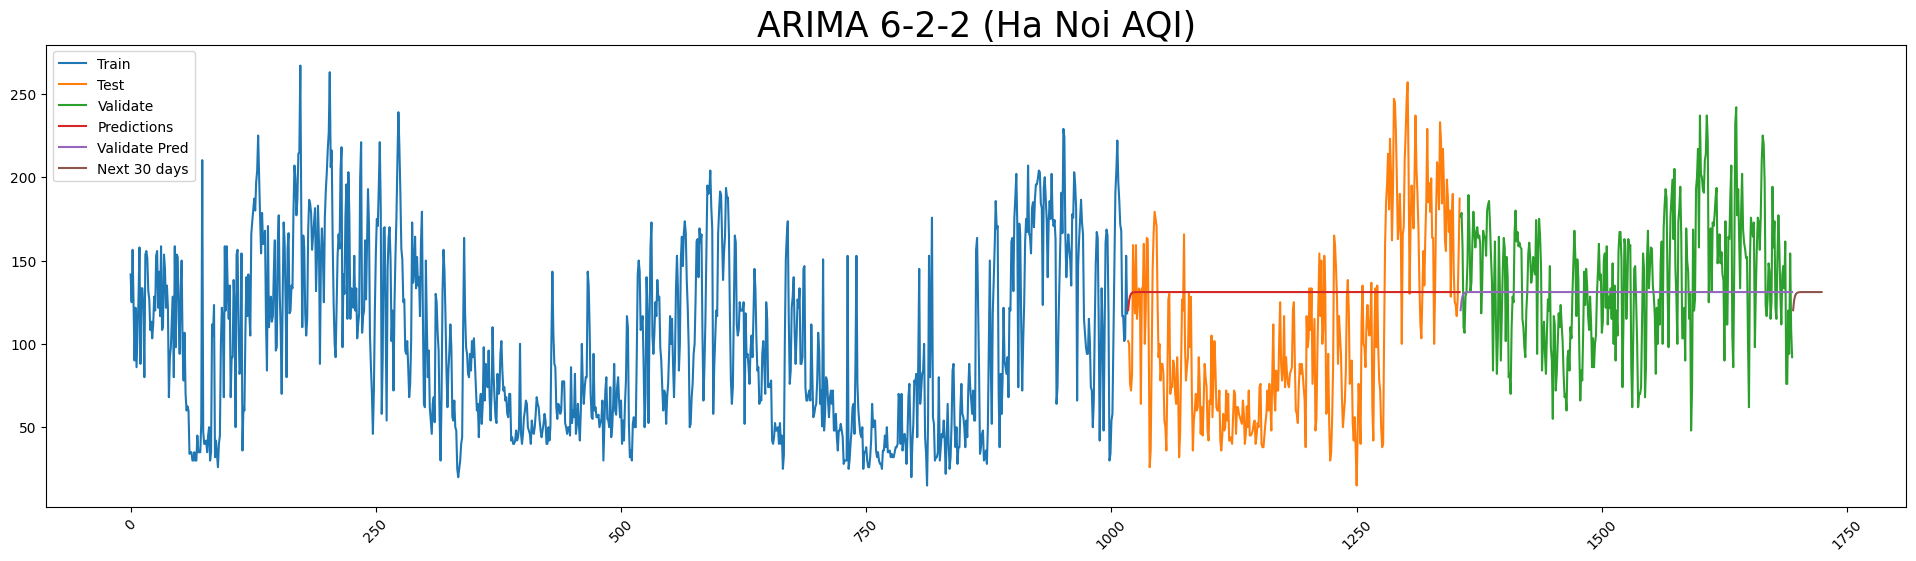

In [ ]:
# Lấy giá trị của cột number_days ở dòng cuối cùng
last_number_days = df.index[-1]

# Tạo một Series mới với 30 ngày tiếp theo dựa vào giá trị cuối cùng của cột number_days
next_30_days_data = pd.Series(range(last_number_days + 1, last_number_days + 31))


plt.figure(figsize=(24, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])
plt.plot(val_data.index, val_data['AQI'])

plt.plot(test_data.index, test_pred)
plt.plot(val_data.index, val_pred)
plt.plot(next_30_days_data , next_30days_pred)
plt.legend(['Train', 'Test', 'Validate', 'Predictions', 'Validate Pred', 'Next 30 days'])
plt.xticks(rotation=45)
plt.title('ARIMA 6-2-2 (Ha Noi AQI)', fontsize=25)

plt.show()

**Du doan cho du lieu Viet Tri**

In [ ]:
# Lay du lieu
df = pd.read_csv('/content/drive/My Drive/Dataset_PTDLKD/AQI_VietTri_Done.csv')
df = df.dropna()
df['date'] = pd.to_datetime(df['date'])
# df = df.sort_values(by='date')
df = df.sort_values(by='date')
df = df.reset_index()


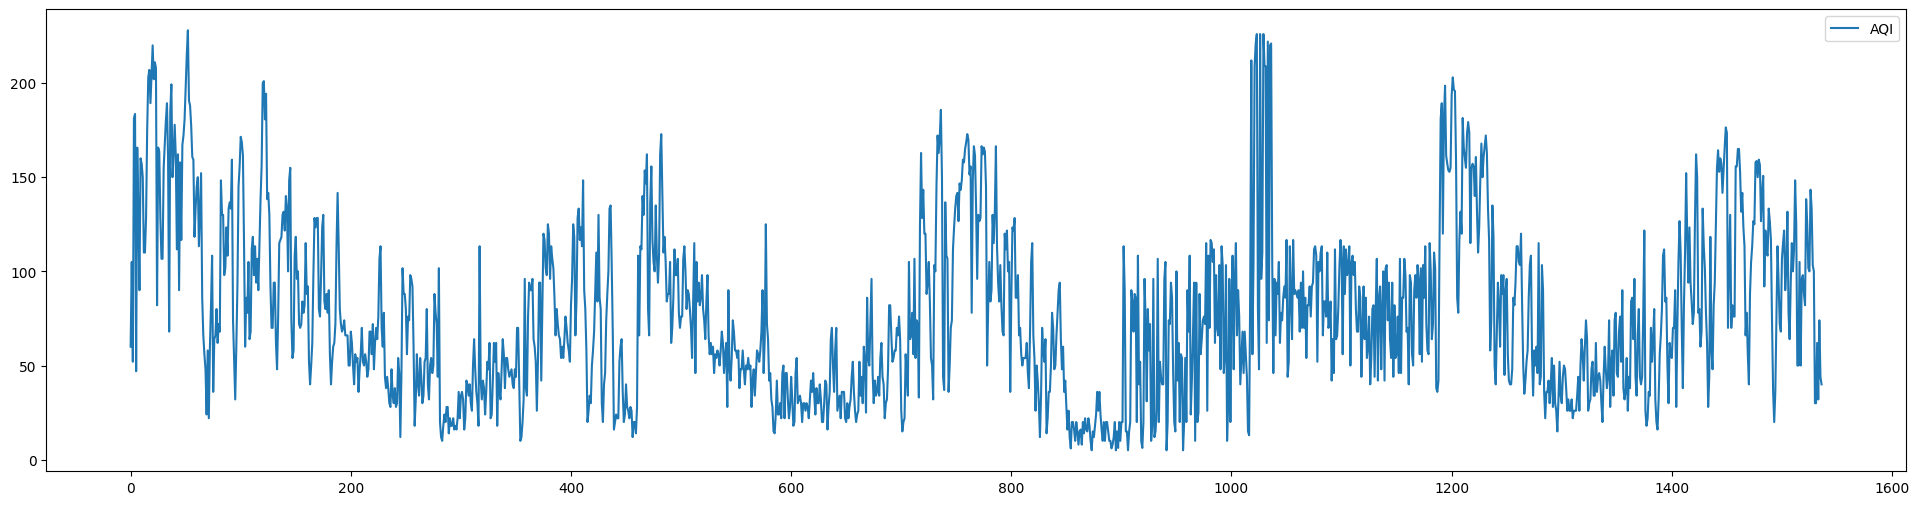

In [ ]:
plt.figure(figsize=(24, 6))
plt.plot(df.index, df['AQI'])
plt.legend(['AQI'])
plt.show()

Chia du lieu 7:2:1

In [ ]:
# Chia dữ liệu thành tập train, tập test, tập validate theo tỉ lệ 7:2:1
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]


In [ ]:
model = auto_arima(train_data['AQI'],
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)
model.fit(train_data['AQI'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10292.758, Time=1.81 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10527.162, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10413.329, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10333.264, Time=0.60 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10525.163, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10282.532, Time=1.82 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=10301.933, Time=0.54 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10288.765, Time=0.60 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=10281.937, Time=1.76 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=10299.438, Time=0.83 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=10282.326, Time=2.25 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=10281.154, Time=1.86 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=10290.001, Time=1.57 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=10282.993, Time=6.20 sec
 ARIMA(1,1,5)(0,0,0

ARIMA(order=(1, 1, 4), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
# Test
test_pred = model.predict(n_periods=len(test_data.index))
# Validate
val_pred = model.predict(n_periods=len(val_data.index))
# Dự đoán 10 tháng tiếp theo
next_30days_pred = model.predict( n_periods=30)

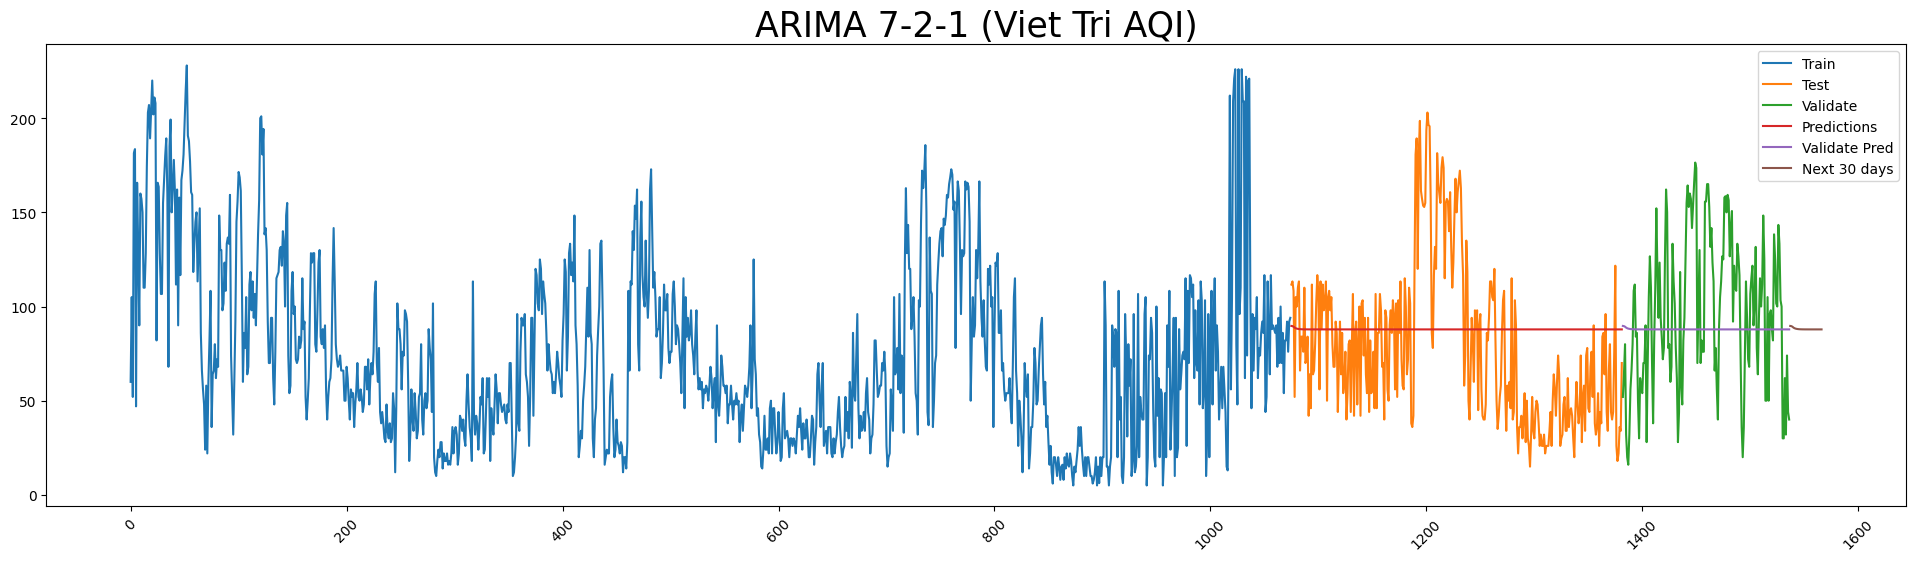

In [ ]:
# Lấy giá trị của cột number_days ở dòng cuối cùng
last_number_days = df.index[-1]

# Tạo một Series mới với 30 ngày tiếp theo dựa vào giá trị cuối cùng của cột number_days
next_30_days_data = pd.Series(range(last_number_days + 1, last_number_days + 31))


plt.figure(figsize=(24, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])
plt.plot(val_data.index, val_data['AQI'])

plt.plot(test_data.index, test_pred)
plt.plot(val_data.index, val_pred)
plt.plot(next_30_days_data , next_30days_pred)
plt.legend(['Train', 'Test', 'Validate', 'Predictions', 'Validate Pred', 'Next 30 days'])
plt.xticks(rotation=45)
plt.title('ARIMA 7-2-1 (Viet Tri AQI)', fontsize=25)

plt.show()

Chia du lieu 8:1:1

In [ ]:
# Chia dữ liệu thành tập train, tập test, tập validate theo tỉ lệ 8:2:1
train_size = int(0.8 * len(df))
test_size = int(0.1 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]


In [ ]:
model = auto_arima(train_data['AQI'],
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)
model.fit(train_data['AQI'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11756.286, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12033.402, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11898.752, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11802.637, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12031.409, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=11745.931, Time=1.22 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=11766.073, Time=0.55 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11752.287, Time=0.66 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=11745.145, Time=1.87 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=11762.941, Time=0.98 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.75 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=11744.483, Time=3.37 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=11752.576, Time=2.18 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=11746.399, Time=3.27 sec
 ARIMA(1,1,5)(0,0,0)[0] i

ARIMA(order=(1, 1, 4), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
# Test
test_pred = model.predict(n_periods=len(test_data.index))
# Validate
val_pred = model.predict(n_periods=len(val_data.index))
# Dự đoán 10 tháng tiếp theo
next_30days_pred = model.predict( n_periods=30)

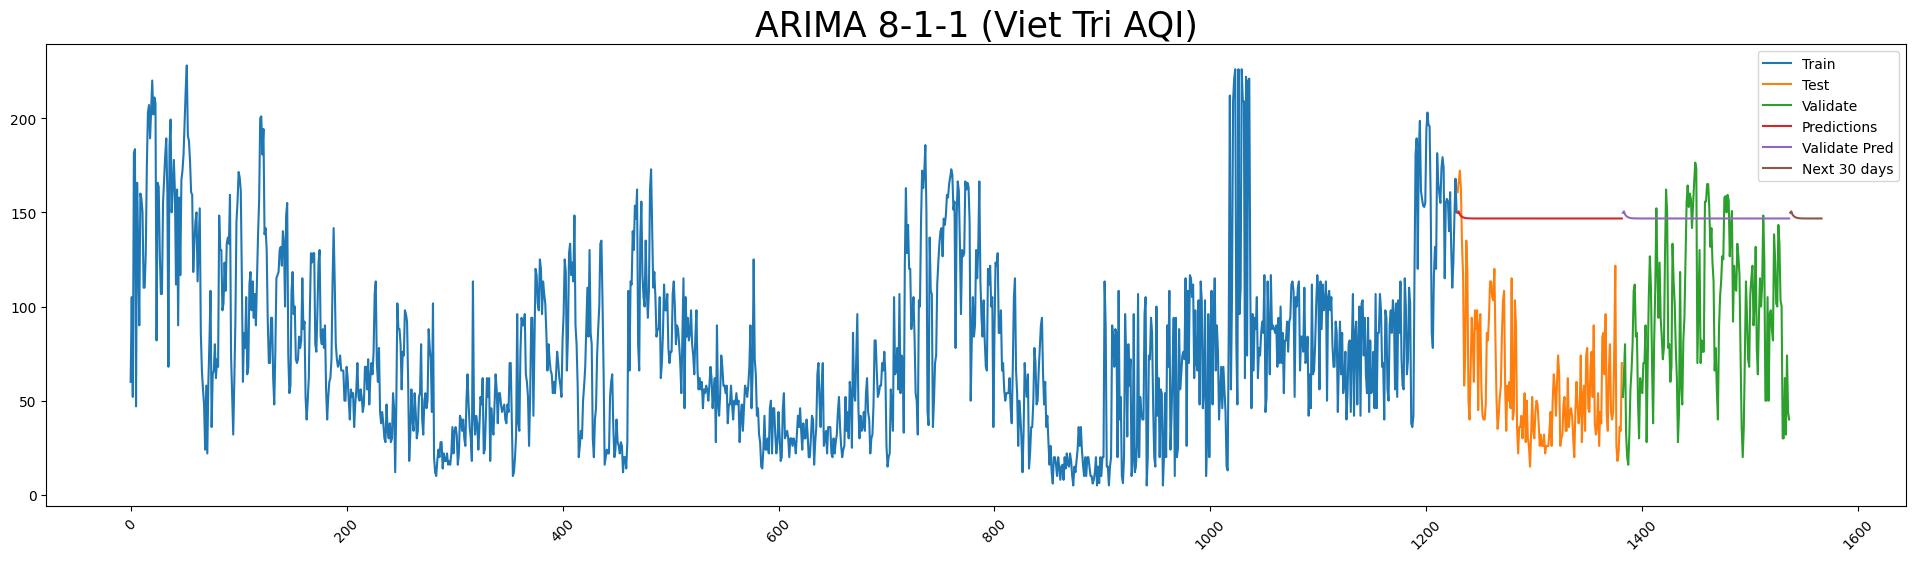

In [ ]:
# Lấy giá trị của cột number_days ở dòng cuối cùng
last_number_days = df.index[-1]

# Tạo một Series mới với 30 ngày tiếp theo dựa vào giá trị cuối cùng của cột number_days
next_30_days_data = pd.Series(range(last_number_days + 1, last_number_days + 31))


plt.figure(figsize=(24, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])
plt.plot(val_data.index, val_data['AQI'])

plt.plot(test_data.index, test_pred)
plt.plot(val_data.index, val_pred)
plt.plot(next_30_days_data , next_30days_pred)
plt.legend(['Train', 'Test', 'Validate', 'Predictions', 'Validate Pred', 'Next 30 days'])
plt.xticks(rotation=45)
plt.title('ARIMA 8-1-1 (Viet Tri AQI)', fontsize=25)

plt.show()

Chia du lieu thanh 6:2:2

In [ ]:
# Chia dữ liệu thành tập train, tập test, tập validate theo tỉ lệ 6:2:2
train_size = int(0.6 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [ ]:
model = auto_arima(train_data['AQI'],
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)
model.fit(train_data['AQI'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8544.337, Time=1.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8673.063, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8631.661, Time=0.32 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8607.112, Time=0.77 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8671.065, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8541.749, Time=1.23 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=8571.918, Time=0.93 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8540.487, Time=1.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8541.872, Time=1.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=8600.157, Time=0.44 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=8538.708, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=8605.112, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=8629.663, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=8540.119, Time=0.40 sec
 ARIMA(1,1,2)(0,0,0)[0]          

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
# Test
test_pred = model.predict(n_periods=len(test_data.index))
# Validate
val_pred = model.predict(n_periods=len(val_data.index))
# Dự đoán 10 tháng tiếp theo
next_30days_pred = model.predict( n_periods=30)

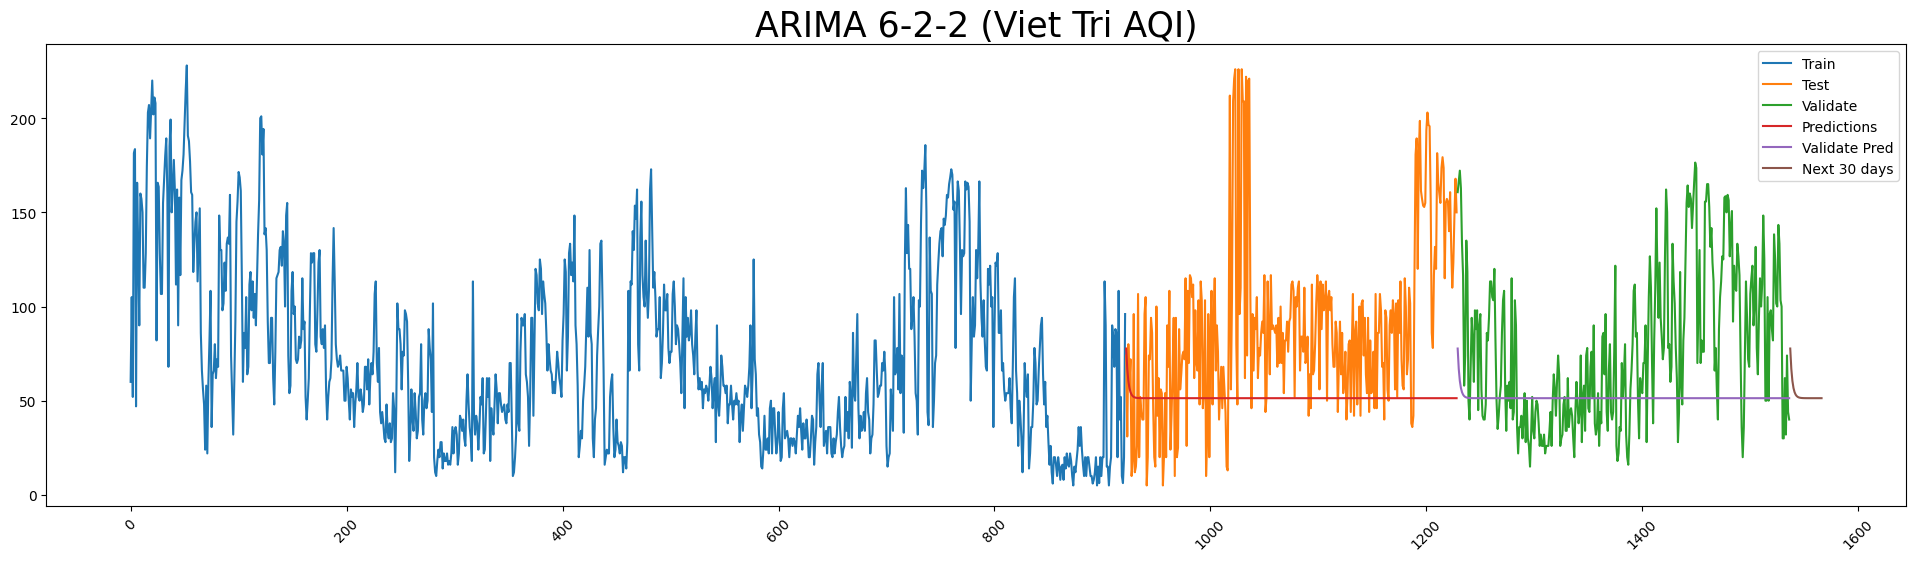

In [ ]:
# Lấy giá trị của cột number_days ở dòng cuối cùng
last_number_days = df.index[-1]

# Tạo một Series mới với 30 ngày tiếp theo dựa vào giá trị cuối cùng của cột number_days
next_30_days_data = pd.Series(range(last_number_days + 1, last_number_days + 31))


plt.figure(figsize=(24, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])
plt.plot(val_data.index, val_data['AQI'])

plt.plot(test_data.index, test_pred)
plt.plot(val_data.index, val_pred)
plt.plot(next_30_days_data , next_30days_pred)
plt.legend(['Train', 'Test', 'Validate', 'Predictions', 'Validate Pred', 'Next 30 days'])
plt.xticks(rotation=45)
plt.title('ARIMA 6-2-2 (Viet Tri AQI)', fontsize=25)

plt.show()